In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
# Importing data
df = pd.read_csv('/etlstage/PEE_joint/NUS_modules/CS5340/group_data/GME_stock.csv')
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [8]:
# Plotting the open, close, high, low, volume and adjusted close value for the term of 12 months
fig = px.line(df, x=df.index, y=df.columns,
              title='Plot of values for a 12 month period')
fig.update_xaxes(
    dtick="M12",
    tickformat="%b\n%Y")


fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [9]:
# Plotting the total amount traded
df['total_amount_traded'] = df['open_price']*df['volume']

fig = px.line(df, x=df.index, y=df.total_amount_traded,
              title='Plot of total amount traded = open_price * volume')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

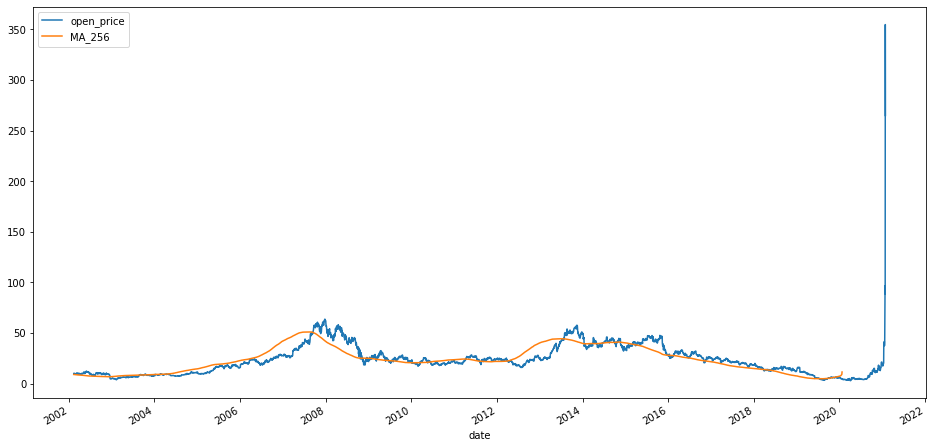

In [11]:
# Plotting the moving average for the opening price
df['MA_256'] = df['open_price'].rolling(256).mean()
df[['open_price','MA_256']].plot(figsize=(16,8))